In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.simplefilter('ignore')
%matplotlib inline

In [ ]:
xls_file=pd.ExcelFile("/content/drive/My Drive/dataset/oil prices/RBRTEd.xls")

brent=xls_file.parse("Data 1")
brent.columns=brent.iloc[1]
brent=brent.iloc[2:]
brent["Date"]=brent["Date"].astype('datetime64[ns]')
brent.columns=["date","oil_price"]
brent.head()


,date,oil_price
2,1987-05-20,18.63
3,1987-05-21,18.45
4,1987-05-22,18.55
5,1987-05-25,18.6
6,1987-05-26,18.63


In [ ]:
brent

,date,oil_price
2,1987-05-20,18.63
3,1987-05-21,18.45
4,1987-05-22,18.55
5,1987-05-25,18.6
6,1987-05-26,18.63
...,...,...
7638,2017-06-20,43.98
7639,2017-06-21,44.62
7640,2017-06-22,44.46
7641,2017-06-23,44.14


In [ ]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7641 entries, 2 to 7642
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7641 non-null   datetime64[ns]
 1   oil_price  7641 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 119.5+ KB


In [ ]:
shares=["RDSB.L","BP.L","CNE.L","PMO.L","STL.OL","FP.PA","REP.MC","ENGI.PA","SLB.PA"]
all_data=pd.DataFrame()
for index in range(len(shares)):
  stock=pd.DataFrame()
  stock=pd.read_csv("/content/drive/My Drive/dataset/oil prices/"+shares[index]+".csv")
  stock=stock[["Date","Close"]]
  stock["Date"]=stock["Date"].astype('datetime64[ns]')
  stock.columns=["date","share_price"]
  test=pd.DataFrame(brent)
  output=stock.merge(test,on="date",how="left")
  stock["oil_price"]=output["oil_price"]
  stock["share_price"]=pd.to_numeric(stock['share_price'],errors='coerce').dropna(0)
  stock['oil_price']=pd.to_numeric(stock['oil_price'],errors='coerce').dropna(0)
  stock['year']=pd.to_datetime(stock["date"]).dt.year
  stock["name"]=shares[index]
  stock=stock.dropna()
  from sklearn.preprocessing import MinMaxScaler
  scaler=MinMaxScaler()
  stock["share_price_scaled"]=scaler.fit_transform(stock["share_price"].to_frame())
  all_data=all_data.append(stock)


,date,share_price,oil_price,year,name,share_price_scaled
0,2000-05-15,1193.597412,28.26,2000,RDSB.L,0.309123
1,2000-05-16,1191.409302,28.78,2000,RDSB.L,0.307755
2,2000-05-17,1164.911255,28.40,2000,RDSB.L,0.291187
3,2000-05-18,1204.315063,28.90,2000,RDSB.L,0.315824
4,2000-05-19,1215.334106,29.01,2000,RDSB.L,0.322714


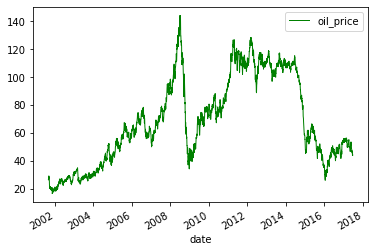

In [ ]:
stock[['date','oil_price']].set_index('date').plot(color="green",linewidth=1.0)

In [ ]:
all_data.tail()

,date,share_price,oil_price,year,name,share_price_scaled
4060,2017-06-20,59.990002,43.98,2017,SLB.PA,0.694511
4061,2017-06-21,59.139999,44.62,2017,SLB.PA,0.682295
4062,2017-06-22,59.220001,44.46,2017,SLB.PA,0.683444
4063,2017-06-23,58.790001,44.14,2017,SLB.PA,0.677264
4064,2017-06-26,58.650002,44.09,2017,SLB.PA,0.675252


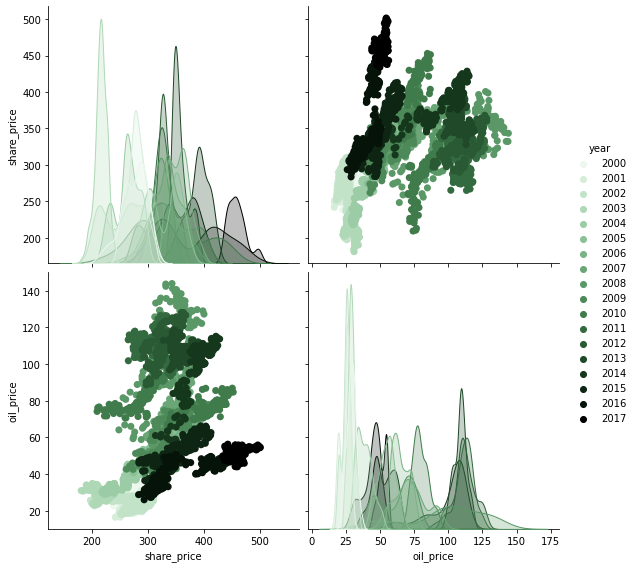

In [ ]:
palette=sns.cubehelix_palette(18,start=2,rot=0,dark=0,light=0.95,reverse=False)
sns.pairplot(all_data[all_data['name']=="BP.L"].drop(['share_price_scaled'],axis=1),hue="year",palette=palette,size=4,markers="o",plot_kws=dict(s=50,edgecolor="b",linewidth=0))

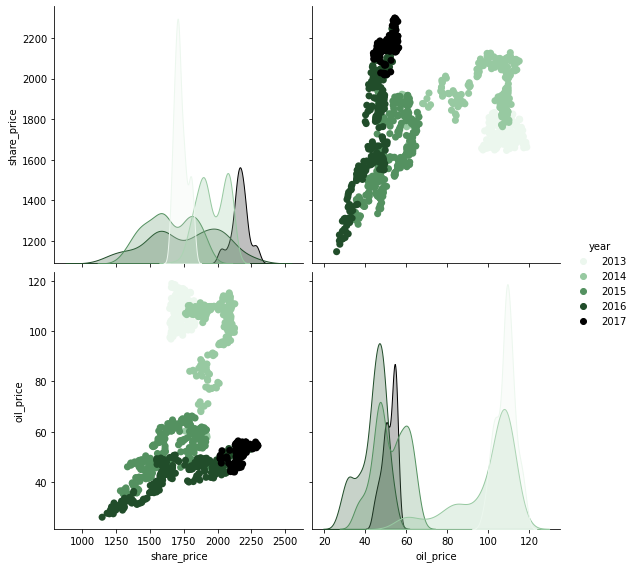

In [ ]:
all_data13=all_data[all_data["year"]>2012]
palette=sns.cubehelix_palette(5,start=2,rot=0,dark=0,light=0.95,reverse=False)
sns.pairplot(all_data13[all_data13['name']=="RDSB.L"].drop(["share_price_scaled"],axis=1),hue="year",palette=palette,size=4,markers="o",plot_kws=dict(s=50,edgecolor="b",linewidth=0))

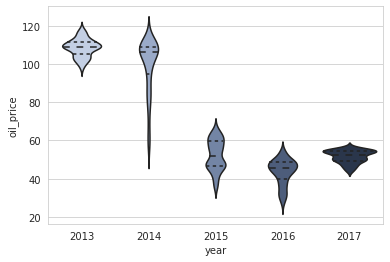

In [ ]:
sns.set_style("whitegrid")
palette=sns.cubehelix_palette(5,start=2.8,rot=0,dark=0.2,light=0.8,reverse=False)
sns.violinplot(x="year",y="oil_price",data=all_data13[all_data13["name"]=="RDSB.L"],inner="quart",palette=palette,trim=True)

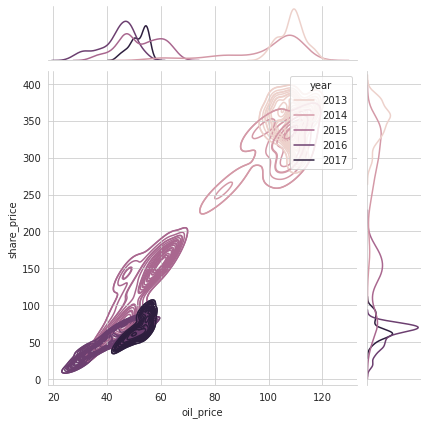

In [ ]:
sns.jointplot("oil_price","share_price",data=all_data13[all_data13['name']=="PMO.L"],kind="kde",hue="year",size=6,ration=2,color="red").plot_joint(sns.kdeplot,zorder=0,n_levels=20)

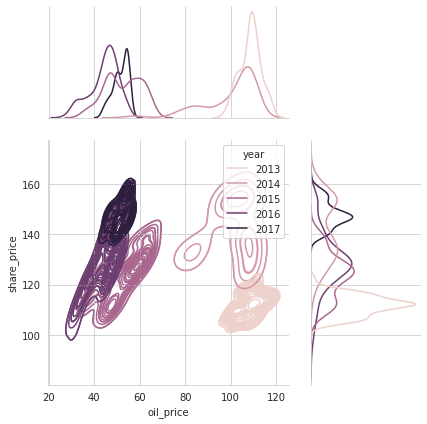

In [ ]:
sns.jointplot("oil_price", "share_price",data=all_data13[all_data13['name']=="STL.OL"],kind="kde",
              hue="year",size=6,ratio=2,color="blue").plot_joint(sns.kdeplot, zorder=0, n_levels=20)


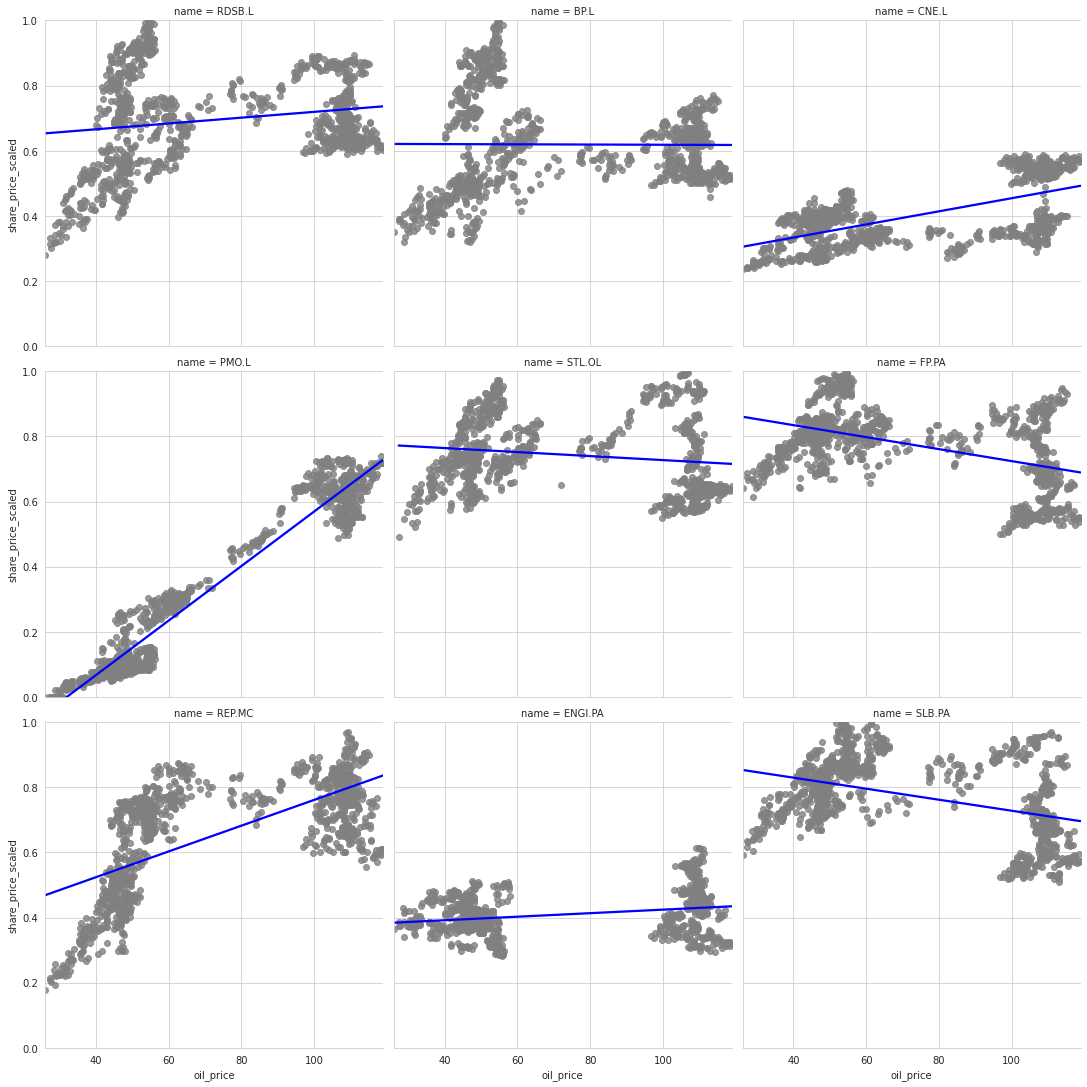

In [ ]:
sns.lmplot(x="oil_price",y="share_price_scaled",col="name",ci=None,col_wrap=3,data=all_data13,order=1,line_kws={'color':'blue'},scatter_kws={'color':'grey'}).set(ylim=(0,1))

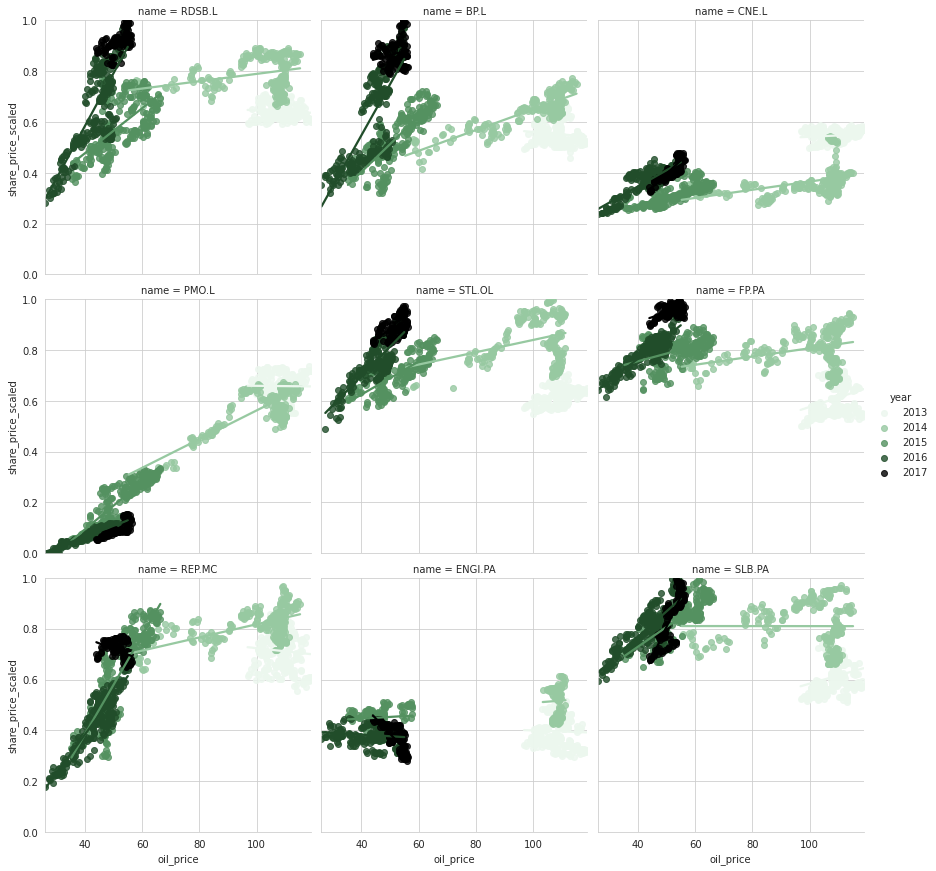

In [ ]:
palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.lmplot(x="oil_price", y="share_price_scaled",hue="year", col="name",ci=None, 
           col_wrap=3, data=all_data13, order=1,palette=palette,size=4).set(ylim=(0, 1))

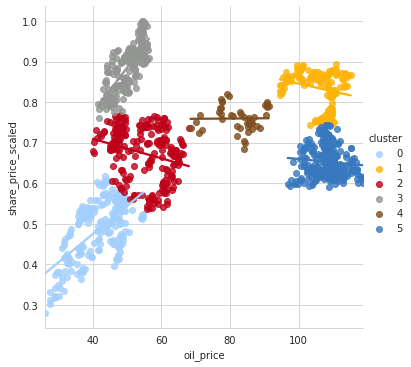

In [ ]:
from sklearn.cluster import KMeans
shell=pd.DataFrame()
shell=all_data13[all_data13['name']=="RDSB.L"]
shell["oil_price_scaled"]=scaler.fit_transform(shell["oil_price"].to_frame())
shell["cluster"]=KMeans(n_clusters=6,random_state=1).fit_predict(shell[["share_price_scaled","oil_price_scaled"]])
colors=["baby blue","amber","scarlet","grey","milk chocolate","windows blue"]
palette=sns.xkcd_palette(colors)
sns.lmplot(x="oil_price",y="share_price_scaled",ci=None,palette=palette,hue="cluster",fit_reg=9,data=shell)

In [ ]:
shell